# kNN или Метод ближайших соседей

### Импортируем библеотеки

In [157]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler





### Загружаем данные

In [79]:
data = pd.read_csv("data.csv")

In [80]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Убираем лишние данные

In [91]:
data = data.drop(['Unnamed: 32', "id"], axis = 1, errors='ignore')

### Меням тип данных

In [93]:
data['diagnosis'] = data['diagnosis'].apply(lambda x: 1 if x=='M' else 0)

In [94]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Смотрим статистику

In [99]:
data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Смотрим распределение по целевому признаку

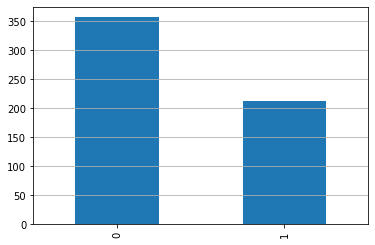

In [101]:
data['diagnosis'].value_counts().plot.bar(figsize=(6, 4))
plt.grid(axis='y')

### Смотрим baseline качества

In [123]:
print(data['diagnosis'].value_counts(normalize=True))
print(f"\033[1mBaseline equals to ~ {int(100*data['diagnosis'].value_counts(normalize=True)[1])}%")

0    0.627417
1    0.372583
Name: diagnosis, dtype: float64
Baseline equals to ~ 37%


### Берем параметры со средними значениями 

In [104]:
data_mean = data[['diagnosis','radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']]

### Строим гистограмму

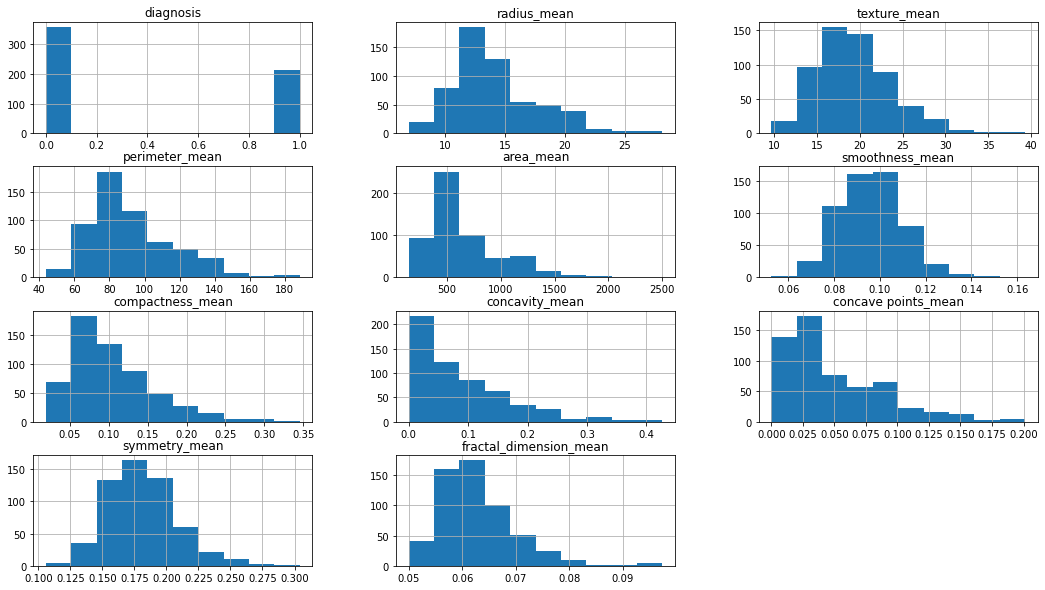

In [132]:
data_mean.hist(figsize=(18, 10));

### Создаем heatmap для матрицы корреляций 

Отображаем признаки только с влиянием больше 0.5

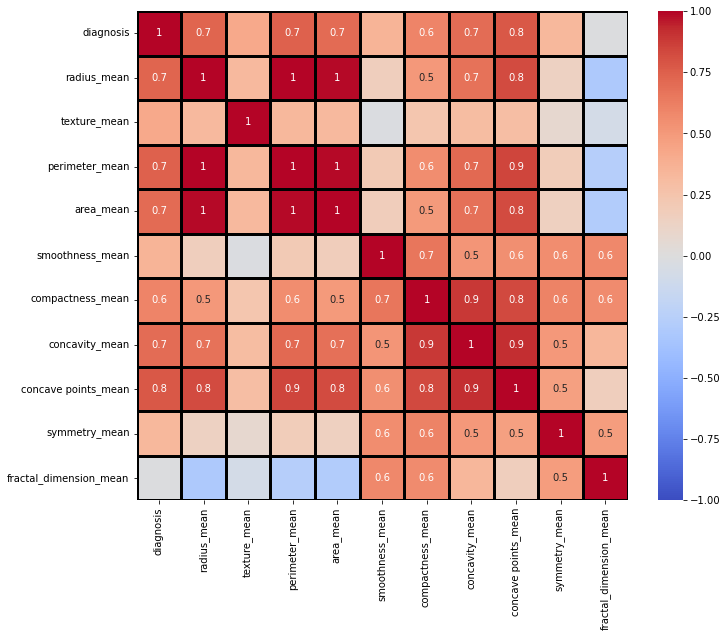

In [124]:
fig, ax = plt.subplots(figsize=(11, 9))
ax = sns.heatmap(data_mean.corr(), annot = True, fmt='.1g', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black')

for t in ax.texts:
    if float(t.get_text())>=0.5 or float(t.get_text())<=-0.5:
        t.set_text(t.get_text()) 
    else:
        t.set_text("")

### Берем параметры с большим признаком влияния

In [127]:
data_corr = data_mean[['diagnosis','radius_mean', 'perimeter_mean', 'area_mean',
       'compactness_mean', 'concavity_mean',
       'concave points_mean']]

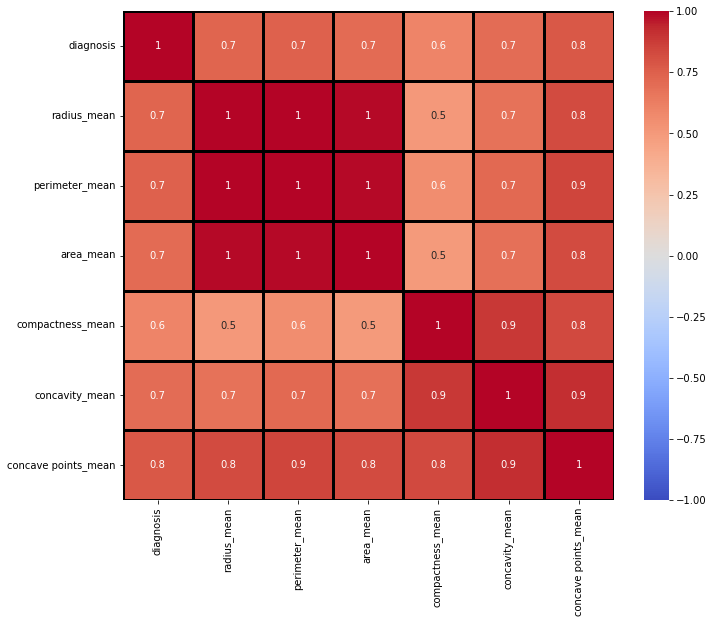

In [128]:
fig, ax = plt.subplots(figsize=(11, 9))
ax = sns.heatmap(data_corr.corr(), annot = True, fmt='.1g', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black')

for t in ax.texts:
    if float(t.get_text())>=0.5 or float(t.get_text())<=-0.5:
        t.set_text(t.get_text()) 
    else:
        t.set_text("")

### Строим pairplot

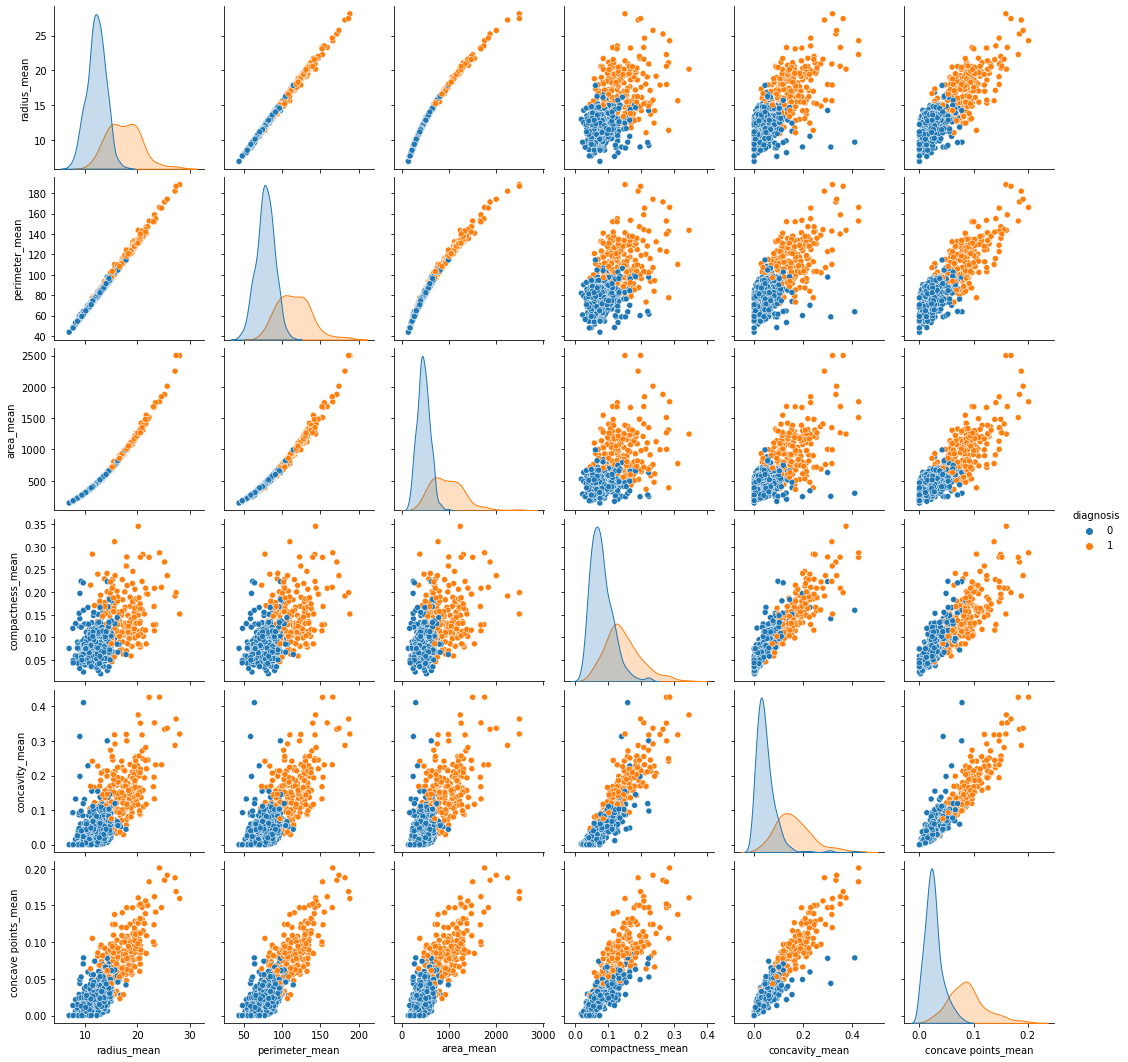

In [130]:
sns.pairplot(data_corr, hue='diagnosis');

### Разделяем данные на train и test

In [206]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['diagnosis'], axis=1), data['diagnosis'], test_size=0.33, random_state=42, stratify=data['diagnosis']
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((381, 30), (188, 30), (381,), (188,))

### Проверям соотношение 

In [146]:
print(f"\033[1mСоотношение обучения\033[0m \n{y_train.value_counts(normalize=True)}")
print(f"\033[1mСоотношение тестирования\033[0m \n{y_test.value_counts(normalize=True)}")

Соотношение обучения 
0    0.628141
1    0.371859
Name: diagnosis, dtype: float64
Соотношение тестирования 
0    0.625731
1    0.374269
Name: diagnosis, dtype: float64


### Проверяем метрики и выбираем соседей

k = 1
Матрица ошибок 
[[115   3]
 [  8  62]]
Отчет по метрикам 
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       118
           1       0.95      0.89      0.92        70

    accuracy                           0.94       188
   macro avg       0.94      0.93      0.94       188
weighted avg       0.94      0.94      0.94       188

k = 3
Матрица ошибок 
[[118   0]
 [  9  61]]
Отчет по метрикам 
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       118
           1       1.00      0.87      0.93        70

    accuracy                           0.95       188
   macro avg       0.96      0.94      0.95       188
weighted avg       0.96      0.95      0.95       188

k = 5
Матрица ошибок 
[[118   0]
 [  8  62]]
Отчет по метрикам 
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       118
           1       1.00      0.89      0.94  

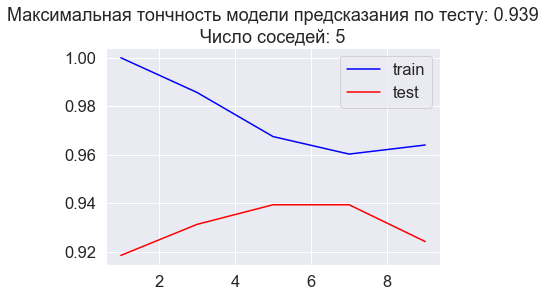

In [300]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

neighbors = [ x for x in range(10) if x % 2 != 0]
f1_score_train = []
f1_score_test = []
for k in neighbors:
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    f1_score_train.append(f1_score(model.predict(X_train_scaled), y_train))
    f1_score_test.append(f1_score(model.predict(X_test_scaled), y_test))
    print(f'k = {k}')
    print(f'\033[1mМатрица ошибок\033[0m \n{confusion_matrix(y_test, predictions)}')
    print(f'\033[1mОтчет по метрикам\033[0m \n{classification_report(y_test, predictions)}')

    
       
plt.plot(neighbors, f1_score_train, color='blue', label='train')
plt.plot(neighbors, f1_score_test, color='red', label='test')
plt.title("Максимальная тончность модели предсказания по тесту: {:.3f}\nЧисло соседей: {}".format(max(f1_score_test), neighbors[np.argmax(f1_score_test)]))
plt.legend();  
 